# Global Terrorism Impact

In [1]:
import pandas as pd
# import streamlit as st
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
# import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("/Users/asutoshdalei/Desktop/Work/GlobalTerrorism/globalterrorismdb.csv",encoding= 'ISO-8859-1')
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

data=data[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
data['casualities']=data['Killed']+data['Wounded']

data = data[(data.Month!=0) & (data.Day!=0)]

def dateFnx(row):
    date = str(row['Month'])+':'+str(row['Day'])+':'+str(row['Year'])
    return pd.to_datetime(date,format='%m:%d:%Y')

data['date'] = data.apply(dateFnx,axis=1)

In [24]:
print(data.shape)
data.head()

(180800, 19)


Year  Month  Day             Country                       Region  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
5  1970      1    1       United States                North America   
6  1970      1    2             Uruguay                South America   
7  1970      1    2       United States                North America   
8  1970      1    2       United States                North America   

            city   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
5          Cairo  37.005105  -89.176269                   Armed Assault   
6     Montevideo -34.891151  -56.187214                   Assassination   
7        Oakland  37.791927 -122.225906               Bombing/Explosion   
8        Madison  43.076592  -89.412488  Facility/Infrastructure Attack   

   Killed  Wounded                                             Target  \
0     1.0      0.0                                       Julio Guzman   
5     0.0      0.0                          Cairo Police Headquarters   
6     0.0      0.0  Juan Maria de Lucah/Chief of Directorate of in...   
7     0.0      0.0                                    Edes Substation   
8     0.0      0.0  R.O.T.C. offices at University of Wisconsin, M...   

                                             Summary                Group  \
0                                                NaN               MANO-D   
5  1/1/1970: Unknown African American assailants ...   Black Nationalists   
6                                                NaN  Tupamaros (Uruguay)   
7  1/2/1970: Unknown perpetrators detonated explo...              Unknown   
8  1/2/1970: Karl Armstrong, a member of the New ...      New Year's Gang   

                   Target_type Weapon_type  \
0  Private Citizens & Property     Unknown   
5                       Police    Firearms   
6                       Police    Firearms   
7                    Utilities  Explosives   
8                     Military  Incendiary   

                                           Motive  casualities       date  
0                                             NaN          1.0 1970-07-02  
5  To protest the Cairo Illinois Police Deparment          0.0 1970-01-01  
6                                             NaN          0.0 1970-01-02  
7                                             NaN          0.0 1970-01-02  
8     To protest the War in Vietnam and the draft          0.0 1970-01-02

In [47]:
# for _,row in data.iterrows():
#     print(row)
# data[['Year','Month']]#.groupby(['Year','Month'],axis=0).apply(list)
a = data.groupby(['Year','Month'])['latitude'].apply(list).iloc[1]
b = data.groupby(['Year','Month'])['longitude'].apply(list).iloc[1]

pd.DataFrame({'LAT':a,'LON':b})

a = data.groupby(['Year','Month'])['latitude'].apply(list)
c = a.index.to_list()[8]

a[c]


[40.008171,
 37.99749,
 37.755363,
 37.432805,
 37.548148,
 35.14968,
 44.943829,
 -34.891151,
 54.607712,
 43.064388,
 33.745573,
 41.82277,
 34.097866,
 50.11797,
 47.36865,
 52.370216,
 52.370216,
 42.58176,
 52.50153,
 -31.399301,
 43.07295,
 29.647665,
 31.950001,
 -34.891151,
 -34.61768,
 51.504387,
 -34.891151,
 -34.891151,
 -32.951052,
 41.67086,
 42.811978,
 42.350097,
 -34.891151,
 40.697132,
 52.50153,
 40.697132,
 -34.891151,
 40.697132,
 40.697132,
 54.607712]

In [6]:
data.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'latitude',
       'longitude', 'AttackType', 'Killed', 'Wounded', 'Target', 'Summary',
       'Group', 'Target_type', 'Weapon_type', 'Motive', 'casualities', 'date'],
      dtype='object')

In [7]:
data.head(3)

Year  Month  Day             Country                       Region  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
5  1970      1    1       United States                North America   
6  1970      1    2             Uruguay                South America   

            city   latitude  longitude     AttackType  Killed  Wounded  \
0  Santo Domingo  18.456792 -69.951164  Assassination     1.0      0.0   
5          Cairo  37.005105 -89.176269  Armed Assault     0.0      0.0   
6     Montevideo -34.891151 -56.187214  Assassination     0.0      0.0   

                                              Target  \
0                                       Julio Guzman   
5                          Cairo Police Headquarters   
6  Juan Maria de Lucah/Chief of Directorate of in...   

                                             Summary                Group  \
0                                                NaN               MANO-D   
5  1/1/1970: Unknown African American assailants ...   Black Nationalists   
6                                                NaN  Tupamaros (Uruguay)   

                   Target_type Weapon_type  \
0  Private Citizens & Property     Unknown   
5                       Police    Firearms   
6                       Police    Firearms   

                                           Motive  casualities       date  
0                                             NaN          1.0 1970-07-02  
5  To protest the Cairo Illinois Police Deparment          0.0 1970-01-01  
6                                             NaN          0.0 1970-01-02

In [8]:
data.Country.unique().tolist()

['Dominican Republic',
 'United States',
 'Uruguay',
 'Italy',
 'East Germany (GDR)',
 'Ethiopia',
 'Guatemala',
 'Philippines',
 'Venezuela',
 'West Germany (FRG)',
 'Switzerland',
 'Jordan',
 'Spain',
 'Brazil',
 'Egypt',
 'Argentina',
 'Lebanon',
 'Japan',
 'Ireland',
 'Turkey',
 'Paraguay',
 'Iran',
 'United Kingdom',
 'Colombia',
 'Bolivia',
 'Greece',
 'Nicaragua',
 'Belgium',
 'Mexico',
 'Netherlands',
 'Canada',
 'Australia',
 'Pakistan',
 'Zambia',
 'Sweden',
 'Costa Rica',
 'South Yemen',
 'Israel',
 'Poland',
 'Taiwan',
 'Panama',
 'West Bank and Gaza Strip',
 'Austria',
 'Czechoslovakia',
 'India',
 'France',
 'South Vietnam',
 'Cambodia',
 'Brunei',
 'Zaire',
 "People's Republic of the Congo",
 'Portugal',
 'Algeria',
 'El Salvador',
 'Thailand',
 'Haiti',
 'Sudan',
 'Morocco',
 'Cyprus',
 'Myanmar',
 'Afghanistan',
 'Peru',
 'Chile',
 'Honduras',
 'Yugoslavia',
 'Ecuador',
 'New Zealand',
 'Malaysia',
 'Singapore',
 'Botswana',
 'Kuwait',
 'Jamaica',
 'Chad',
 'North Yeme

In [9]:
data[data[['latitude','longitude']].notna()][['latitude','longitude']]

latitude   longitude
0       18.456792  -69.951164
5       37.005105  -89.176269
6      -34.891151  -56.187214
7       37.791927 -122.225906
8       43.076592  -89.412488
...           ...         ...
181686   2.359673   45.385034
181687  35.407278   35.942679
181688   6.900742  124.437908
181689  24.798346   93.940430
181690   7.209594  124.241966

[180800 rows x 2 columns]

In [10]:
data[data.latitude.notna() & data.longitude.notna()][['latitude','longitude']]

latitude   longitude
0       18.456792  -69.951164
5       37.005105  -89.176269
6      -34.891151  -56.187214
7       37.791927 -122.225906
8       43.076592  -89.412488
...           ...         ...
181686   2.359673   45.385034
181687  35.407278   35.942679
181688   6.900742  124.437908
181689  24.798346   93.940430
181690   7.209594  124.241966

[176330 rows x 2 columns]

In [11]:
yearCount = data.groupby('Year')['Month'].count()
yearCount.head()

Year
1970    636
1971    461
1972    561
1973    463
1974    572
Name: Month, dtype: int64

In [12]:
weekCases = data[['casualities','date']].set_index('date').resample('W')['casualities'].count()
# data['date']
weekCasualities = data[['casualities','date']].set_index('date').resample('W')['casualities'].count()
# data['date']
weekCases


date
1970-01-04      6
1970-01-11      5
1970-01-18      5
1970-01-25      9
1970-02-01     11
             ... 
2017-12-03    206
2017-12-10    163
2017-12-17    146
2017-12-24    130
2017-12-31    150
Freq: W-SUN, Name: casualities, Length: 2505, dtype: int64

In [13]:
tt = data[['casualities','date']].set_index('date').resample('Y')['casualities'].count()

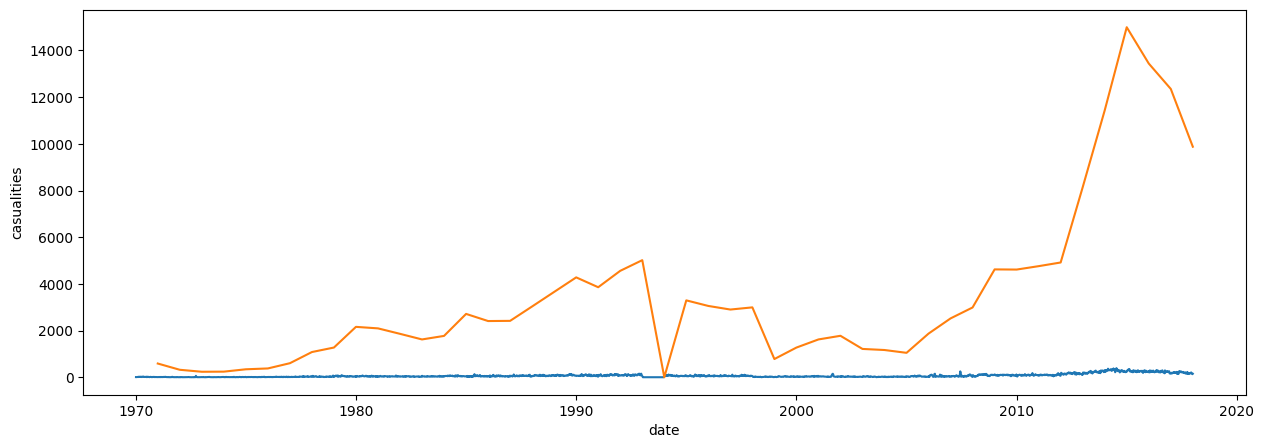

In [14]:
plt.figure(figsize=(15,5),dpi=100)
# sns.lineplot(data=data,x='date',y='casualities')
sns.lineplot(weekCases)
sns.lineplot(tt)
plt.show()

In [15]:
a,b = data[data.Country=='India']['date'].agg(['min','max'])

a,b = data[data.latitude.notna() & data.longitude.notna()]['date'].agg(['min','max'])
a,b
c = pd.date_range(a,b,freq = 'W').strftime('%Y-%m-%d').tolist()

In [16]:
data[data.date<c[0]]
# a

Year  Month  Day        Country         Region        city   latitude  \
5   1970      1    1  United States  North America       Cairo  37.005105   
6   1970      1    2        Uruguay  South America  Montevideo -34.891151   
7   1970      1    2  United States  North America     Oakland  37.791927   
8   1970      1    2  United States  North America     Madison  43.076592   
9   1970      1    3  United States  North America     Madison  43.072950   
10  1970      1    1  United States  North America     Baraboo  43.468500   

     longitude                      AttackType  Killed  Wounded  \
5   -89.176269                   Armed Assault     0.0      0.0   
6   -56.187214                   Assassination     0.0      0.0   
7  -122.225906               Bombing/Explosion     0.0      0.0   
8   -89.412488  Facility/Infrastructure Attack     0.0      0.0   
9   -89.386694  Facility/Infrastructure Attack     0.0      0.0   
10  -89.744299               Bombing/Explosion     0.0      0.0   

                                               Target  \
5                           Cairo Police Headquarters   
6   Juan Maria de Lucah/Chief of Directorate of in...   
7                                     Edes Substation   
8   R.O.T.C. offices at University of Wisconsin, M...   
9   Selective Service Headquarters in Madison Wisc...   
10                            Badger Army ammo depot.   

                                              Summary  \
5   1/1/1970: Unknown African American assailants ...   
6                                                 NaN   
7   1/2/1970: Unknown perpetrators detonated explo...   
8   1/2/1970: Karl Armstrong, a member of the New ...   
9   1/3/1970: Karl Armstrong, a member of the New ...   
10                                                NaN   

                              Group           Target_type Weapon_type  \
5                Black Nationalists                Police    Firearms   
6               Tupamaros (Uruguay)                Police    Firearms   
7                           Unknown             Utilities  Explosives   
8                   New Year's Gang              Military  Incendiary   
9                   New Year's Gang  Government (General)  Incendiary   
10  Weather Underground, Weathermen              Military  Explosives   

                                            Motive  casualities       date  
5   To protest the Cairo Illinois Police Deparment          0.0 1970-01-01  
6                                              NaN          0.0 1970-01-02  
7                                              NaN          0.0 1970-01-02  
8      To protest the War in Vietnam and the draft          0.0 1970-01-02  
9      To protest the War in Vietnam and the draft          0.0 1970-01-03  
10                                             NaN          0.0 1970-01-01

In [17]:
data['Weapon_type'].value_counts()
data['Weapon_type']
data.groupby('Weapon_type')['casualities'].sum()

Weapon_type
Biological                                                                        814.0
Chemical                                                                        14377.0
Explosives                                                                     537257.0
Fake Weapons                                                                        1.0
Firearms                                                                       224944.0
Incendiary                                                                       8886.0
Melee                                                                           14391.0
Other                                                                             199.0
Radiological                                                                        6.0
Sabotage Equipment                                                                357.0
Unknown                                                                         49737.0
Vehicle (not to incl

---


In [49]:
data.groupby('Country')['Region'].agg(['unique']).apply(lambda x:x[0][0],axis=1).rename("Region").reset_index()

Country                      Region
0    Afghanistan                  South Asia
1        Albania              Eastern Europe
2        Algeria  Middle East & North Africa
3        Andorra              Western Europe
4         Angola          Sub-Saharan Africa
..           ...                         ...
200        Yemen  Middle East & North Africa
201   Yugoslavia              Eastern Europe
202        Zaire          Sub-Saharan Africa
203       Zambia          Sub-Saharan Africa
204     Zimbabwe          Sub-Saharan Africa

[205 rows x 2 columns]

In [50]:
dft1 = data.groupby('Country')['casualities'].sum().rename('casualities_sum').reset_index()
dft2 = data.groupby('Country')['casualities'].count().rename('num_attacks').reset_index()
dft3 = data.groupby('Country')['Region'].agg(['unique']).apply(lambda x:x[0][0],axis=1).rename("Region").reset_index()

dft = pd.merge(left=dft1,right=dft2,on='Country')
dft = pd.merge(left=dft,right=dft3,on='Country')

# dft1

In [51]:
dft

Country  casualities_sum  num_attacks                      Region
0    Afghanistan          80200.0        11939                  South Asia
1        Albania            168.0           76              Eastern Europe
2        Algeria          19141.0         2603  Middle East & North Africa
3        Andorra              0.0            0              Western Europe
4         Angola           4771.0          443          Sub-Saharan Africa
..           ...              ...          ...                         ...
200        Yemen          16285.0         2914  Middle East & North Africa
201   Yugoslavia            391.0          191              Eastern Europe
202        Zaire            449.0           47          Sub-Saharan Africa
203       Zambia            132.0           60          Sub-Saharan Africa
204     Zimbabwe            374.0           92          Sub-Saharan Africa

[205 rows x 4 columns]

In [90]:
data.head()

Year  Month  Day             Country                       Region  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
5  1970      1    1       United States                North America   
6  1970      1    2             Uruguay                South America   
7  1970      1    2       United States                North America   
8  1970      1    2       United States                North America   

            city   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
5          Cairo  37.005105  -89.176269                   Armed Assault   
6     Montevideo -34.891151  -56.187214                   Assassination   
7        Oakland  37.791927 -122.225906               Bombing/Explosion   
8        Madison  43.076592  -89.412488  Facility/Infrastructure Attack   

   Killed  Wounded                                             Target  \
0     1.0      0.0                                       Julio Guzman   
5     0.0      0.0                          Cairo Police Headquarters   
6     0.0      0.0  Juan Maria de Lucah/Chief of Directorate of in...   
7     0.0      0.0                                    Edes Substation   
8     0.0      0.0  R.O.T.C. offices at University of Wisconsin, M...   

                                             Summary                Group  \
0                                                NaN               MANO-D   
5  1/1/1970: Unknown African American assailants ...   Black Nationalists   
6                                                NaN  Tupamaros (Uruguay)   
7  1/2/1970: Unknown perpetrators detonated explo...              Unknown   
8  1/2/1970: Karl Armstrong, a member of the New ...      New Year's Gang   

                   Target_type Weapon_type  \
0  Private Citizens & Property     Unknown   
5                       Police    Firearms   
6                       Police    Firearms   
7                    Utilities  Explosives   
8                     Military  Incendiary   

                                           Motive  casualities       date  
0                                             NaN          1.0 1970-07-02  
5  To protest the Cairo Illinois Police Deparment          0.0 1970-01-01  
6                                             NaN          0.0 1970-01-02  
7                                             NaN          0.0 1970-01-02  
8     To protest the War in Vietnam and the draft          0.0 1970-01-02

In [94]:
dft = data[['Year','casualities']]
data

fig = px.box(dft,x='Year',y='casualities',points=False,log_y=True)
# fig = go.Figure(data=[go.Box(dft,x='Year',y='casualities', boxpoints='outliers')])
fig.update_layout(title="Number of attacks v/s Casualities at a nation level")
fig.update_xaxes(title_text="Casualities")
fig.update_yaxes(title_text="Number of attacks")
fig.show()

In [ ]:
fig = px.scatter(dft,x='casualities_sum',y='num_attacks',color='Region',hover_name="Country",log_x=True,log_y=True,size_max=60)
fig.update_layout(title="Number of attacks v/s Casualities at a nation level")
fig.update_xaxes(title_text="Casualities")
fig.update_yaxes(title_text="Number of attacks")
fig.show()


In [73]:
fig = px.scatter(dft,x='casualities_sum',y='num_attacks',color='Region',hover_name="Country",log_x=True,log_y=True,size_max=60)
fig.update_layout(title="Number of attacks v/s Casualities at a nation level")
fig.update_xaxes(title_text="Casualities")
fig.update_yaxes(title_text="Number of attacks")
fig.show()


In [82]:
import plotly.graph_objects as go

# Sample data
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Create a figure
fig = go.Figure()

# Add a box trace
fig.add_trace(go.Box(y=data))

# Update the layout (optional)
fig.update_layout(title="Basic Box Plot")

# Show the plot
fig.show()